###  Data Preparation

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('C:/Users/HP 830 G6/Desktop/KAIM/week-3/data/insurance_data.csv')

# Step 1: Handling Missing Data
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Example: Impute missing values in 'Total_Claim' with the median
data['Total_Claim'].fillna(data['Total_Claim'].median(), inplace=True)

# If there are other columns with missing values, handle them similarly
# For example, if 'Premium' has missing values, you might do:
# data['Premium'].fillna(data['Premium'].mean(), inplace=True)

# Step 2: Feature Engineering
# Create a new feature: Claim to Premium Ratio
data['Claim_to_Premium_Ratio'] = data['Total_Claim'] / data['Premium']

# Step 3: Encoding Categorical Data
# One-hot encode the 'Province' and 'Gender' columns
data = pd.get_dummies(data, columns=['Province', 'Gender'], drop_first=True)

# Step 4: Train-Test Split
# Define your features (X) and target variable (y)
X = data.drop(['Total_Claim'], axis=1)  # Features
y = data['Total_Claim']  # Target variable

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Missing values in each column:
Series([], dtype: int64)
Training set shape: (800, 7), Test set shape: (200, 7)


C:\Users\HP 830 G6\AppData\Local\Temp\ipykernel_21400\679040988.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Total_Claim'].fillna(data['Total_Claim'].median(), inplace=True)


### Model Techniques

### Implement Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MSE: {mse_linear}, R^2: {r2_linear}")

Linear Regression - MSE: 9813.230889367125, R^2: 0.9644298873915264


###  Implement Random Forests

In [4]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R^2: {r2_rf}")

Random Forest - MSE: 3517.049036441452, R^2: 0.9872517184517388


### Decision Tree Code

In [5]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - MSE: {mse_dt}, R^2: {r2_dt}")

Decision Tree - MSE: 8097.067682068447, R^2: 0.9706504807135765


### Implement XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MSE: {mse_xgb}, R^2: {r2_xgb}")

### Document Model Performance

### Model Performance Summary

### 1. Linear Regression
- **Mean Squared Error (MSE)**: 9813.23
- **R-squared (R²)**: 0.9644
- **Interpretation**: The model explains approximately 96.44% of the variance in the target variable (Total Claims). The MSE indicates the average squared difference between the predicted and actual values.

### 2. Random Forest
- **Mean Squared Error (MSE)**: 3517.05
- **R-squared (R²)**: 0.9873
- **Interpretation**: The Random Forest model explains about 98.73% of the variance, which is significantly higher than the Linear Regression model. The lower MSE indicates better predictive performance.

### 3. Decision Tree
- **Mean Squared Error (MSE)**: 8097.07
- **R-squared (R²)**: 0.9707
- **Interpretation**: The Decision Tree model explains approximately 97.07% of the variance. While it performs well, its MSE is higher than that of the Random Forest model, indicating less accuracy in predictions.

### Conclusion
- **Comparison**: Among the three models, the Random Forest model demonstrates the best performance in terms of both MSE and R². It provides the lowest error and the highest explanatory power regarding the variance in Total Claims.


### Visualization

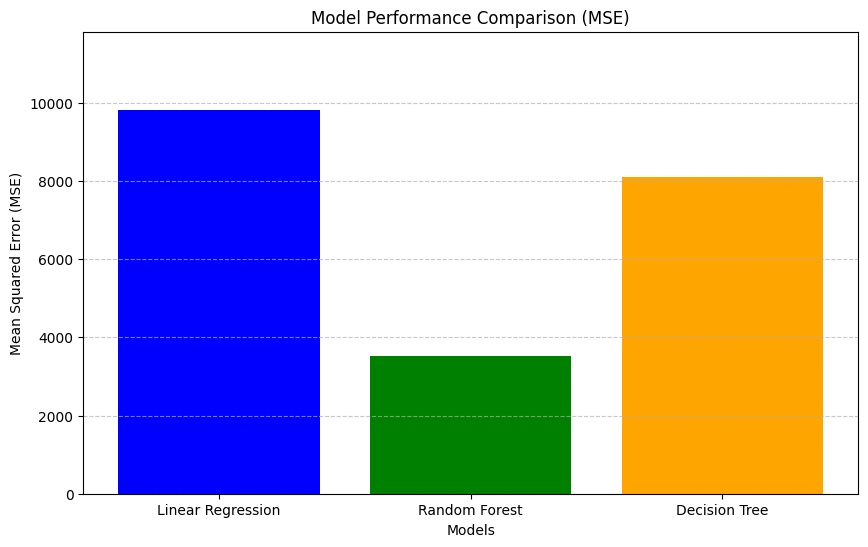

In [8]:
import matplotlib.pyplot as plt

# Model names and their MSE values
models = ['Linear Regression', 'Random Forest', 'Decision Tree']
mse_values = [9813.23, 3517.05, 8097.07]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'orange'])
plt.title('Model Performance Comparison (MSE)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Models')
plt.ylim(0, max(mse_values) + 2000)  # Set y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for clarity
plt.show()